In [1]:
#This is a 6 part figure containing the meat of the paper
#CKH 4-21-17 is plotting it up

#This job entails: #Verifying with group that I got each data's provenance right, and it was valid data
#Watching and making volume/time measurements on the horizontal flow rate videos from December
#Downloading the valid LabView data onto my computer (with a backup to my own Dropbox) so I can rename, sort, and organize 
#freely without wrecking our lab's the fine-tuned organizational system
#Noting details like electrolyte, pore size, and waveform shape where applicable.  - An ongoing process at lab meetings
#Labeling my copies to keep track of each trace's origin, done. Now organized by pore size
#Assessing what we have and arranging it into 6 subplots that line up vertically with the same
#units and scale where it makes a useful comparison -- Done. (This notebook is the result)
#Thinking about how to maintain a tie to the original data files. For now I'm putting links next to the data here.

#Thinking about what models we have or could make to discuss the data, and what conclusions can be drawn: 
    #My electrical simulation model in another notebook will connect to pressure-vs-pore size. To do as soon as plot 1 is finished. 
    #Am drafting a circuit model to connect to IV plots. First attempt left out the pore resistance and did not capture all the behavior
    #Efficiency can be discussed now that we have pressure and flow rate and voltage and current.

#Creating legends when there are multiple traces on a subplot -- done on one of these subplots.
#Using what I know or can guess about the experimental setup, plus what's in the data, to estimate uncertainties for error bars

#Scavenger hunt for additional data points missing from the pressure vs voltage plot. Seeking pressure
#data from 0.6 and 0.8 micron samples. We need fresh Millipore water when the system is working.

#Going through the models and fitting the data to one or more of these plots,
#Exporting it to eps - use plt.savefig("title.eps")
#Working it over in Illustrator in different formats so it has labels (a,b,c etc) to refer to in figure captions
#Working it so it is legible on presentation slides especially axis labels & legends
#and splitting it into separate slides where needed. easier to do that by breaking up the eps file in Illustrator.
#Making a 2x3 version that works in publication format where it might be printed in monochrome. Also in Illustrator.
import numpy as np

In [2]:
#Plot 1: Pressure vs Pore Size data
#Data available for 250Vpp, grab it singly, show it with uncert.
#OK I may have 0.6 and 0.8 only as sine or triangle waves!  needs to all be squarewave at 250Vpp, 400 Hz to go on this plot
#Jaz: all old 0.4 and 1 micron data should be 250Vpp instead of 120Vpp. Okay I need to verify all voltages on the older data
PoreDia250=[0.4,1,3]#Available pore sizes where I cpi;d have 250Vpp pressure dat.
Pressure250=[390,234,30]#Pressure in Pa. These are the highest values (highest voltages) for each pore diam in Plot 4
#The value for 3 micron is collected 12/8/16 at "120V" and the 1 micron, from 10/20/16 at "150V" so still needs consistency check.
#When did we determine that the voltages were being undermeasured and should be 250? which ones?
PressureError250=[20,20,3]#Pressure error in Pa based on my ability to read the plot
#See if the simulation provides a fit to this data.

In [3]:
#Plot 2: IV data: I am going to grab this from a file. Need to use 10k triangle waves
#The 0.8 micron pores had good IV at 100,300 and 400 Hz but 200Hz had 0 current
#There are also 0.6 micron triangle wave results to analyze. Wait, I only have those at 1kHz sampling freq
#For now: stick with 0.8 micron data at 100, 300 and 400 Hz
SenseResistance=100
ICEOData100= np.loadtxt('../ICEOCurrent/CurrentVsPressure800nm250VppTri100hz10k.lvm', delimiter='\t') 
Timebase100=ICEOData100[:,0]#Going ahead and assuming timebase in seconds. 
PressureData100=ICEOData100[:,1] #Assuming the rest of data is in volts
CurrentData100=[CurrentDatum/SenseResistance for CurrentDatum in ICEOData100[:,2]] #Puts current into units of amperes
VoltageData100=[50*2*VoltageDatum for VoltageDatum in ICEOData100[:,3]]#Assumes 2x voltage divider, and 50x trek gain, and ignores voltage drop across sense resistor

ICEOData300= np.loadtxt('../ICEOCurrent/CurrentVsPressure800nm250VppTri300hz10k.lvm', delimiter='\t') 
Timebase300=ICEOData300[:,0]#Going ahead and assuming timebase in seconds. 
PressureData300=ICEOData300[:,1] #Assuming the rest of data is in volts
CurrentData300=[CurrentDatum/SenseResistance for CurrentDatum in ICEOData300[:,2]] #Puts current into units of amperes
VoltageData300=[50*2*VoltageDatum for VoltageDatum in ICEOData300[:,3]]#Assumes 2x voltage divider, and 50x trek gain, and ignores voltage drop across sense resistor

ICEOData400= np.loadtxt('../ICEOCurrent/CurrentVsPressure800nm250VppTri400hz10k.lvm', delimiter='\t') 
Timebase400=ICEOData400[:,0]#Going ahead and assuming timebase in seconds. 
PressureData400=ICEOData400[:,1] #Assuming the rest of data is in volts
CurrentData400=[CurrentDatum/SenseResistance for CurrentDatum in ICEOData400[:,2]] #Puts current into units of amperes
VoltageData400=[50*2*VoltageDatum for VoltageDatum in ICEOData400[:,3]]#Assumes 2x voltage divider, and 50x trek gain, and ignores voltage drop across sense resistor


In [4]:
def moving_average(a, n) :  #For processing raw pressure-vs-time data below
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n

In [5]:
#Plot 3: Pressure vs time data for 1 micron pores at different voltages
#from the 10-20-16 data found here https://www.dropbox.com/sh/dg343c6iv0azez7/AADjP_vjVEDfZJCTduTp_O6Ua?dl=0
#This is the day before the last proposal deadline so this data may not have made it in.
#It is the same data I used to add 1 micron pressure-vs-voltage points to the pressure-vs-voltage plot
MovingAvgWindw=100
PvsT1umData30=np.loadtxt('1umPVsT10_20_16/PVs30VDevice1umRun1.lvm',delimiter='\t')
PvsT1um30=moving_average(PvsT1umData30[:,1],MovingAvgWindw) 
PvsT1um30=(PvsT1um30-PvsT1um30[0])*1000 #This sets it to a baseline of 0 and converts V to Pa

PvsT1umData60=np.loadtxt('1umPVsT10_20_16/PVs60VDevice1umRun1.lvm',delimiter='\t')
PvsT1um60=moving_average(PvsT1umData60[:,1],MovingAvgWindw)
PvsT1um60=(PvsT1um60-PvsT1um60[0])*1000

PvsT1umData90=np.loadtxt('1umPVsT10_20_16/PVs90VDevice1umRun1.lvm',delimiter='\t')
PvsT1um90=moving_average(PvsT1umData90[:,1],MovingAvgWindw)
PvsT1um90=(PvsT1um90-PvsT1um90[0])*1000

PvsT1umData120=np.loadtxt('1umPVsT10_20_16/PVs120VDevice1umRun1.lvm',delimiter='\t')
PvsT1um120=moving_average(PvsT1umData120[:,1],MovingAvgWindw)
PvsT1um120=(PvsT1um120-PvsT1um120[0])*1000

PvsT1umData150=np.loadtxt('1umPVsT10_20_16/PVs150VDevice1umRun1.lvm',delimiter='\t')
PvsT1um150=moving_average(PvsT1umData150[:,1],MovingAvgWindw)
PvsT1um150=(PvsT1um150-PvsT1um150[0])*1000

PvsT_Timebase=PvsT1umData30[:,0]#all files seem to be the same length
PvsT_Timebase=PvsT_Timebase[0:len(PvsT1um30)]



In [6]:
#Plot 4: Pressure vs Voltage data for different pore sizes. #Still a data scavenger hunt here!
#Like plot 1, I may have 0.6 and 0.8 only as sine or triangle waves and it needs to all be same conditions.
#At least we can use 1 kHz sampled data, don't really need 10 kHz for this. There is a lot more 1kHz sampled data than 10kHz.

x4_04=[0,30,60,90,120]#Voltage amplitudes at electrodes in Jaz experiments with 0.4 micron pore size at 400 Hz
y4_04=[0,75,170,280,390]#Pressure drops in Pa from Jaz experiments. I measured this off his eps plots 
x4_04error=[0,0,0,0,0]
y4_04error=[0,5,5,10,20]#I used the amount of waver in the eps plots as a guess about error in pressure measurement
#I collected the above data here in this notebook https://www.dropbox.com/s/gark2v4tcqjqwzt/ICEODataPlotter.ipynb?dl=0
#It came from this chart. https://www.dropbox.com/s/rfkzm2ofx3p1w67/untitled.pdf?dl=0

x4_06=0 #don't yet have comparable data from these samples
y4_06=0
x4_08=0
y4_08=0

x4_1=[0,30,60,90,120,150]
y4_1=np.array([0,0.001,0.015,0.022,.029,0.034])*101325/14.7 #Have data for the 1 micron pores plotted here https://www.dropbox.com/s/00r9qvneq1a9h97/Data1um.pdf?dl=0
x4_1error=[0,0,0,0,0,0] #I read off the above values from the plots and jotted them in my 4/17/17 lab notebook - CKH
y4_1error=[0,0,5,5,10,20]

x4_3=[0,30,60,90,120]
y4_3=[0,1,0,15,32]# Data from 12/8/16 for 3 micron pores is plotted here https://www.dropbox.com/s/n43mowqgyp92mjv/Plot_data.ipynb?dl=0
x4_3error=[0,0,0,0,0] #Estimated values from plots and converted them to Pa in my 4/22/17 lab notebook - CKH
y4_3error=[0,3,3,3,3]

In [7]:
#Plot 5: Flow rate vs time data. 
#Here's the 120V tube-inlet and tube-outlet data from the 0.4 micron membrane:
#Video is the 120V one in this folder https://www.dropbox.com/sh/g29hdesaf3sy8jo/AACWhlLjoo9iHUwwZmimdJuGa?dl=0
timeSec_5=[5,15,25,35,45,55,65,75]#I read 8 sequential 10-second chunks of the 100-second video
flowRate_5=[58,67,71,62,62,53,58,45]#Got these flow rates in my 4/23/17 lab notebook- CKH
flowRateError_5=[4,4,4,4,4,4,4,4]#error of 4 ul/min based on plus or minus 0.5 mm when reading the distance off the screen

In [8]:
#Plot 6: Flow rate vs voltage. These videos are in the dropbox. What freq and waveform? 400, square
#Link to dropbox location of videos https://www.dropbox.com/sh/g29hdesaf3sy8jo/AACWhlLjoo9iHUwwZmimdJuGa?dl=0
#I am analyzing the series of videos with the soft silicone tubes and have some of the tubes to measure, so
#I can get volumes from measuring the scaled distance traveled by the meniscus 
x6VoltsPP=[5,10,20,35,40,50,120] #Voltages in volts. Do I need to scale these up so 120=250? Is it just linear? Ask Jaz
y6FlowRates=[0,0,0,1.5,5.5,9.8,64]#(Microliter/min) I watched the first three videos and there was only osc motion. The 35V video and beyond had flow.
y6Error=[0,0,0,0.3,0.3,0.5,5]

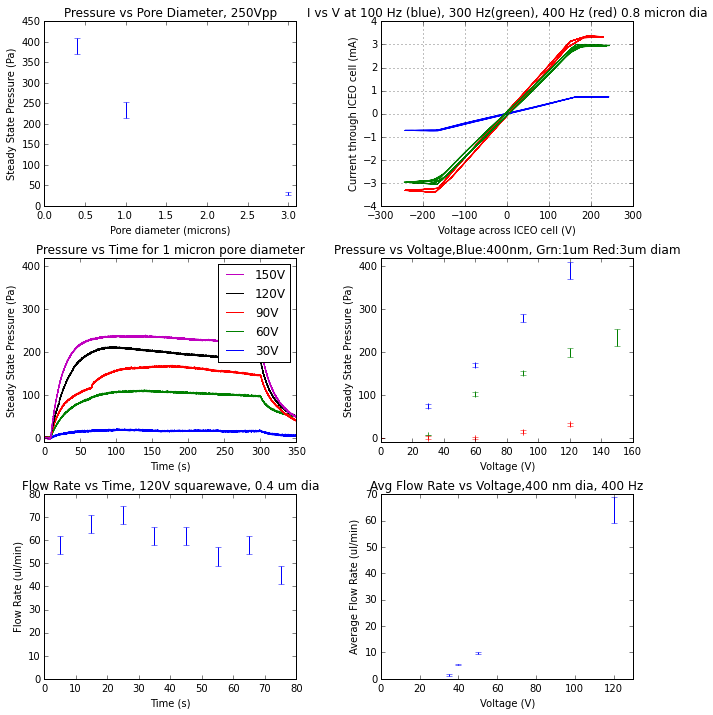

In [9]:
%matplotlib inline
from matplotlib import pyplot as plt
plt.figure(figsize=[10,10])

plt.subplot(3,2,1)

#--------------------Steady State Pressure Vs Pore Size Plot At 250V, using a 400 Hz Square Wave, Dead End Config
plt.errorbar(PoreDia250,Pressure250,PressureError250,ls='none')
plt.title('Pressure vs Pore Diameter, 250Vpp')#Dead-end config means outlet was capped off into the pressure sensor
plt.xlabel('Pore diameter (microns)')
plt.ylabel('Steady State Pressure (Pa)')
axes = plt.gca()
axes.set_xlim([0,3.1])
#This should be a plot with error bars and a fit. Models are in the MembraneICEO folder

#--------------------Instantaneous I-V Curve (Voltammogram) for One Pore Diameter At Different Driving Freqs (Tri Wave, 10kHz sampling rate)
#This current-vs-voltage data was collected by sending a 250Vpp triangle wave across the cell inputs, and
#to ground through a 100 ohm sense resistor in series with the cell.  Electrolyte: DI water. Pore size: 800 nm
#Data collected 3-28-17 and found in this folder https://www.dropbox.com/sh/1gd0pkrf7z2ubbn/AAABDujF-7J1b9mNaY_Nc2BXa?dl=0
plt.subplot(3,2,2)
plt.plot(np.array(VoltageData100[110000:110200]),1000*np.array(CurrentData100[110000:110200]))#plotting in milliamps
plt.title('I vs V at 100 Hz (blue), 300 Hz(green), 400 Hz (red) 0.8 micron dia')
plt.xlabel('Voltage across ICEO cell (V)')
plt.ylabel('Current through ICEO cell (mA)')
plt.grid('on')
plt.hold('true')
plt.plot(np.array(VoltageData400[110000:110200]),1000*np.array(CurrentData400[110000:110200]),'r')#plotting in milliamps
plt.plot(np.array(VoltageData300[110000:110200]),1000*np.array(CurrentData300[110000:110200]),'g')#plotting in milliamps

#--------------------Pressure Vs Time Plot for One Pore Diameter at 400Hz Driving Squarewave, Dead End Config
plt.subplot(3,2,3)
plt.hold('True')
plt.title('Pressure vs Time for 1 micron pore diameter') #conditions: 1 micron pore diameter, 400 Hz square wave, DI water
#JAZ do I need to adjust all these voltages up? this data was from 10-20-16
d30, =plt.plot(PvsT_Timebase,PvsT1um30,'b',label='30V')
d60, =plt.plot(PvsT_Timebase,PvsT1um60,'g',label='60V')
d90, =plt.plot(PvsT_Timebase,PvsT1um90,'r',label='90V')
d120, =plt.plot(PvsT_Timebase,PvsT1um120,'k',label='120V')
d150, =plt.plot(PvsT_Timebase,PvsT1um150,'m',label='150V')#same colors as Jaz's plot from 10-20-16
plt.legend(handles=[d150,d120,d90,d60,d30],loc='upper right')#in eps we can probably move this legend over
plt.xlabel('Time (s)')
plt.ylabel('Steady State Pressure (Pa)') 

axes = plt.gca()
axes.set_xlim([0,350])
axes.set_ylim([-10,420])#this y-scale squashes the plot, but then it is the same as its neighbor
#so you can easily read across and see the 1 micron data points.
#I am going to rearrange the legend to make better use of that empty space

#--------------------Steady-State Pressure Vs Voltage Data for Different Pore Diameters, 400 Hz Driving Squarewave
plt.subplot(3,2,4)
plt.errorbar(x4_04,y4_04,y4_04error,x4_04error,ls='none')
plt.hold('true')
plt.errorbar(x4_1,y4_1,y4_1error,x4_1error,ls='none')
plt.errorbar(x4_3,y4_3,y4_3error,x4_3error,ls='none')


plt.title('Pressure vs Voltage,Blue:400nm, Grn:1um Red:3um diam')#Dead-End Config with DI Water
plt.xlabel('Voltage (V)')
plt.ylabel('Steady State Pressure (Pa)')
axes = plt.gca()
axes.set_ylim([-10,420])
#hmm do I need to adjust all the voltages up from 120Vpp to 250, follow up w student

#--------------------Flow Rate Vs Time for One Pore Size, 400 Hz Driving Squarewave, Open Channel Config
plt.subplot(3,2,5)
plt.errorbar(timeSec_5,flowRate_5,flowRateError_5,ls='None')
plt.title('Flow Rate vs Time, 120V squarewave, 0.4 um dia') #For 0.4 micron pores
plt.xlabel('Time (s)')
plt.ylabel('Flow Rate (ul/min)')
axes = plt.gca()
axes.set_ylim([0,80])
#It would be great to put an inset image from this video https://www.dropbox.com/s/4i53r7hvaf5mypd/120Vpp12_14_16.MOV?dl=0

#--------------------Average Flow Rate vs Voltage for 400 nm Pore Diameter, Open Channel Config
plt.subplot(3,2,6)
plt.errorbar(x6VoltsPP,y6FlowRates,y6Error,ls='none')
plt.title('Avg Flow Rate vs Voltage,400 nm dia, 400 Hz')#open channel, DI water
plt.xlabel('Voltage (V)')
plt.ylabel('Average Flow Rate (ul/min)')
axes = plt.gca()
axes.set_xlim([0,130])


plt.tight_layout() #fixes where subplot x-labels and titles run into each other